## AI Model for Students' Math Score Prediction

In [1]:
# Import necessary libraries for data handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

Duplicate rows: 0


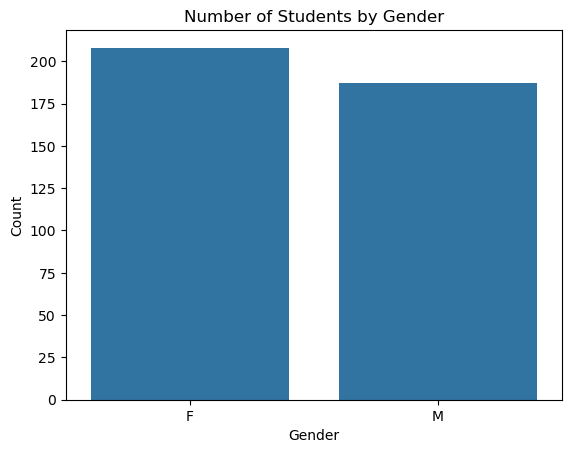

In [5]:
# Gender plot

sns.countplot(x='sex', data=df)
plt.title("Number of Students by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [6]:
# Get an overview of our target  

print(df['G3'].describe())

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


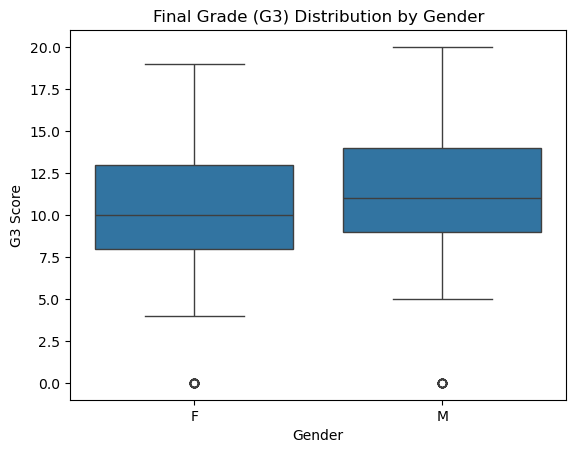

In [7]:
# Score by gender

sns.boxplot(x='sex', y='G3', data=df)
plt.title("Final Grade (G3) Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("G3 Score")
plt.show()

In [8]:
# Check if school plays a role in the G3 score, using a t-test
# If p>0.05 than we can drop the column 'school'

from scipy.stats import ttest_ind

gp_g3 = df[df['school'] == 'GP']['G3']
ms_g3 = df[df['school'] == 'MS']['G3']

t_stat, p_val = ttest_ind(gp_g3, ms_g3)
print(f"T-test p-value: {p_val:.4f}")

T-test p-value: 0.3722


In [9]:
df = df.drop(columns=['school'])

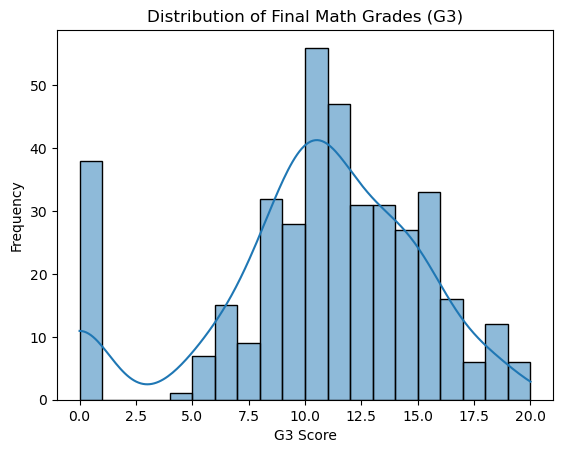

In [10]:
# Histogram for Distribution


sns.histplot(df['G3'], bins=20, kde=True)
plt.title("Distribution of Final Math Grades (G3)")
plt.xlabel("G3 Score")
plt.ylabel("Frequency")
plt.show()

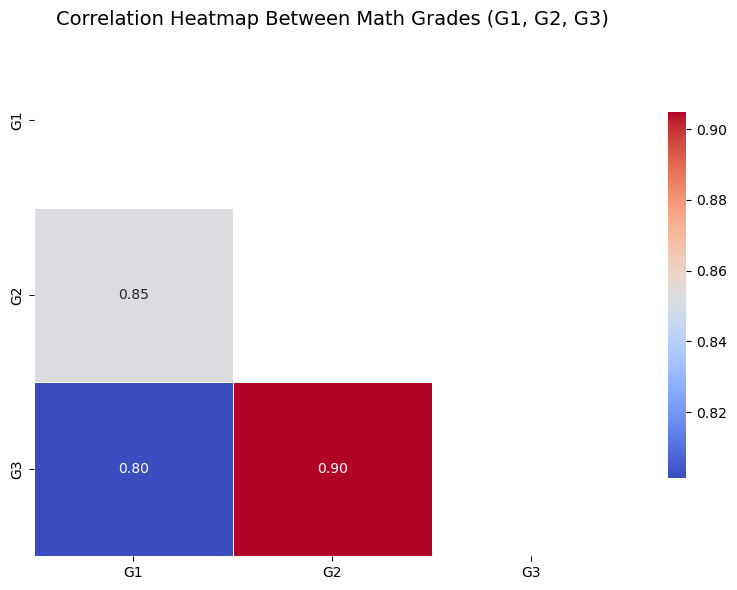

In [11]:
# Select only grade columns
grade_corr = df[['G1', 'G2', 'G3']].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(grade_corr, dtype=bool))

plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask 
sns.heatmap(
    grade_corr,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    fmt=".2f"
)

plt.title("Correlation Heatmap Between Math Grades (G1, G2, G3)", fontsize=14)
plt.tight_layout()
plt.show()

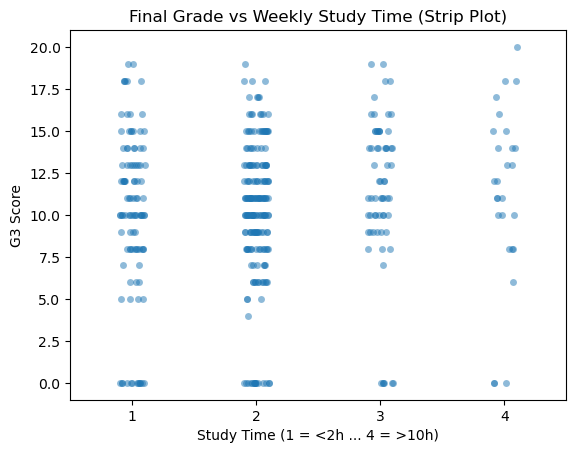

In [12]:
sns.stripplot(x='studytime', y='G3', data=df, jitter=True, alpha=0.5)
plt.title("Final Grade vs Weekly Study Time (Strip Plot)")
plt.xlabel("Study Time (1 = <2h ... 4 = >10h)")
plt.ylabel("G3 Score")
plt.show()


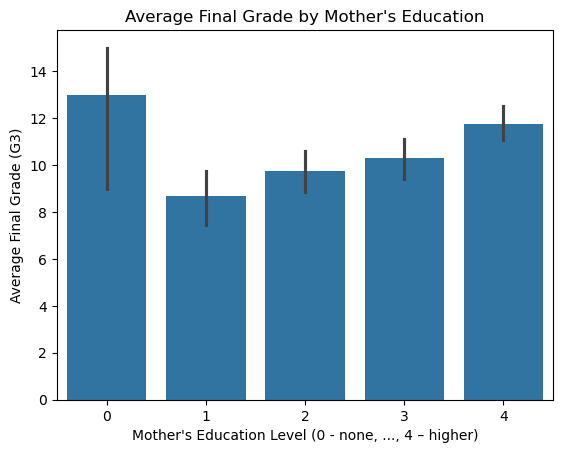

In [13]:
# Mother's education

sns.barplot(x='Medu', y='G3', data=df)
plt.title("Average Final Grade by Mother's Education")
plt.xlabel("Mother's Education Level (0 - none, ..., 4 – higher)")
plt.ylabel("Average Final Grade (G3)")

plt.show()

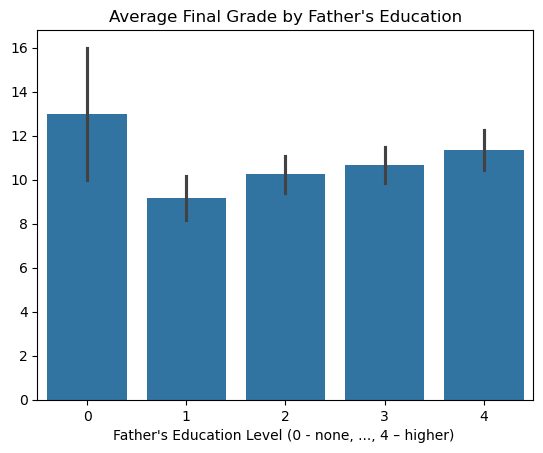

In [14]:

# Father's education

sns.barplot(x='Fedu', y='G3', data=df)
plt.title("Average Final Grade by Father's Education")
plt.xlabel("Father's Education Level (0 - none, ..., 4 – higher) ")
plt.ylabel("")

plt.show()

In [15]:
# Due to counter ituitive results, further analysis is needed

mean_by_medu = df.groupby('Medu')['G3'].mean()
mean_by_fedu = df.groupby('Fedu')['G3'].mean()

print("Mean G3 by Father's Education: \n", mean_by_fedu, "\n")
print("Mean G3 by Mother's Education:\n", mean_by_medu)

Mean G3 by Father's Education: 
 Fedu
0    13.000000
1     9.158537
2    10.260870
3    10.660000
4    11.364583
Name: G3, dtype: float64 

Mean G3 by Mother's Education:
 Medu
0    13.000000
1     8.677966
2     9.728155
3    10.303030
4    11.763359
Name: G3, dtype: float64


In [16]:
print("Counts by Mother's Education:")
print(df.groupby('Medu').size(), "\n")

print("Counts by Father's Education:")
print(df.groupby('Fedu').size())

Counts by Mother's Education:
Medu
0      3
1     59
2    103
3     99
4    131
dtype: int64 

Counts by Father's Education:
Fedu
0      2
1     82
2    115
3    100
4     96
dtype: int64


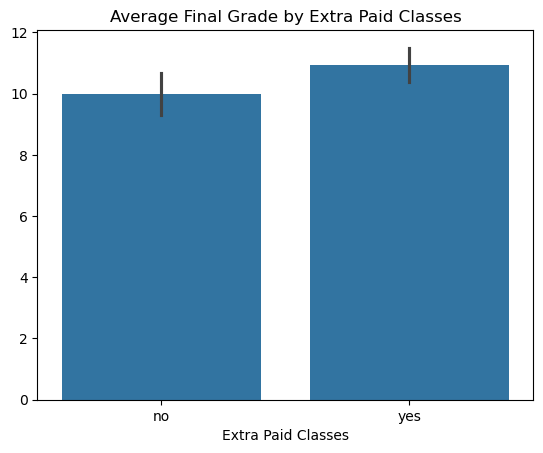

In [17]:
# Extra paid classes

sns.barplot(x='paid', y='G3', data=df)
plt.title("Average Final Grade by Extra Paid Classes")
plt.xlabel("Extra Paid Classes")
plt.ylabel("")

plt.show()

## Modeling

In [18]:
# First pre process the data

# Map binary columns
binary_cols = ['sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0, 'F':0, 'M':1})

# One-hot encoding for nominal variables
nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian', 'address', 'famsize', 'Pstatus']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [19]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [20]:
# Features and target

X = df.drop('G3', axis=1)
y = df['G3']


In [21]:
# Get the attributes with most contributions, from linear regression coefficients

# Standardize features before applying linear regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression model
linreg = LinearRegression()
linreg.fit(X_scaled, y)

# Create a DataFrame with feature names and their coefficients
coefficients = pd.Series(linreg.coef_, index=X.columns)

# Take absolute value to rank by magnitude of influence
top_10 = coefficients.abs().sort_values(ascending=False).head(10)
print("Top 10 most influential features (Linear Regression):\n")
print(top_10)


Top 10 most influential features (Linear Regression):

G2               3.605822
G1               0.618215
absences         0.346409
famrel           0.308647
Walc             0.216496
activities       0.187406
age              0.161727
Dalc             0.161259
schoolsup        0.148757
Fjob_services    0.143265
dtype: float64


In [22]:
# Step 1: Split into temp (train+val) and test (70% train+val, 30% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.3, random_state=37
)


# Step 2: Split temp into train and val (80% train, 20% val of 70%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=37
)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation set
y_val_pred_lr = lr.predict(X_val)

print("Linear Regression Validation RMSE:", mean_squared_error(y_val, y_val_pred_lr))
print("Linear Regression Validation R²:", r2_score(y_val, y_val_pred_lr))


Linear Regression Validation RMSE: 6.579590066276678
Linear Regression Validation R²: 0.7490440957450297


In [24]:
# RMSE is large due to dataset being small and not uniform
# Bin and stratify the tests to ensure consistent distribution across 
# training, validation, and test sets

# Bin y for stratification
y_binned = pd.cut(y, bins=5, labels=False)

# Step 1: Split into temp (train+val) and test (70% train+val, 30% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y_binned, random_state=37
)

# Bin y_temp for stratification in next split
y_temp_binned = pd.cut(y_temp, bins=5, labels=False)

# Step 2: Split temp into train and val (80% train, 20% val of 70%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp_binned, random_state=37
)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation set
y_val_pred_lr = lr.predict(X_val)

print("Linear Regression Validation RMSE:", mean_squared_error(y_val, y_val_pred_lr))
print("Linear Regression Validation R²:", r2_score(y_val, y_val_pred_lr))


Linear Regression Validation RMSE: 2.6349976998304143
Linear Regression Validation R²: 0.8652948489392902


In [26]:
# Initialize Ridge model 
ridge_model = Ridge(alpha=1.0) 

# Train
ridge_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_ridge = ridge_model.predict(X_val)

# Evaluate
rmse_ridge = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))
r2_ridge = r2_score(y_val, y_val_pred_ridge)

print(f"Ridge Regression Validation RMSE: {rmse_ridge}")
print(f"Ridge Regression Validation R²: {r2_ridge}")

Ridge Regression Validation RMSE: 1.623330308953653
Ridge Regression Validation R²: 0.8652844409948768


In [27]:
# Search for best alpha

from sklearn.model_selection import GridSearchCV

alphas = [0.01, 0.1, 1, 10, 100]

ridge = Ridge()
param_grid = {'alpha': alphas}

grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)


best_alpha = grid.best_params_['alpha']
print("Best alpha:", grid.best_params_['alpha'])
print("Best cross-validated RMSE:", -grid.best_score_)

Best alpha: 100
Best cross-validated RMSE: 1.975715476271013


In [28]:
best_ridge=Ridge(alpha= best_alpha)
best_ridge.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

y_test_pred = best_ridge.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {rmse_test}")
print(f"Test R²: {r2_test}")

Test RMSE: 1.985377219154233
Test R²: 0.8176418512359324


In [29]:
# Step 1: Retrain on the full training + validation set
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

linreg = LinearRegression()
linreg.fit(X_train_val, y_train_val)

# Step 2: Predict on the test set
y_test_pred_lin = linreg.predict(X_test)

rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))
r2_test_lin = r2_score(y_test, y_test_pred_lin)

print(f"Linear Regression Test RMSE: {rmse_test_lin:.4f}")
print(f"Linear Regression Test R²: {r2_test_lin:.4f}")

Linear Regression Test RMSE: 2.1094
Linear Regression Test R²: 0.7941


In [30]:
# Step 1: Retrain Ridge on the full train + val set

ridge = Ridge(alpha= best_alpha)  
ridge.fit(X_train_val, y_train_val)

# Step 2: Predict on the test set
y_test_pred_ridge = ridge.predict(X_test)

# Calculate metrics
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Ridge Regression Test RMSE: {rmse_test_ridge:.4f}")
print(f"Ridge Regression Test R²: {r2_test_ridge:.4f}")

Ridge Regression Test RMSE: 1.9854
Ridge Regression Test R²: 0.8176


In [31]:
#Try different model

from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,        # Number of boosting rounds
    learning_rate=0.1,       # Shrinkage step size (controls overfitting)
    max_depth=4,             # Maximum tree depth
    subsample=0.8,           # Row subsampling
    colsample_bytree=0.8,    # Feature subsampling
    random_state=37
)

In [32]:
# Fit model to the training data
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluate the performance
rmse_xgb_val = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))
r2_xgb_val = r2_score(y_val, y_val_pred_xgb)

# Output results
print(f"XGBoost Validation RMSE: {rmse_xgb_val:.4f}")
print(f"XGBoost Validation R²: {r2_xgb_val:.4f}")

XGBoost Validation RMSE: 1.7036
XGBoost Validation R²: 0.8516


In [33]:
# Try to find the best parameters 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 300),           # number of boosting rounds
    'learning_rate': uniform(0.01, 0.3),         # learning rate
    'max_depth': randint(3, 10),                 # max tree depth
    'subsample': uniform(0.6, 0.4),              # % of samples to train each tree
    'colsample_bytree': uniform(0.6, 0.4),       # % of features to train each tree
    'reg_alpha': uniform(0, 1.0),                # L1 regularization
    'reg_lambda': uniform(0.5, 1.0),             # L2 regularization
}

# Create the model
xgb = XGBRegressor(random_state=37)

# Randomized search with 5-fold CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,                           # Number of random combinations to try
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=37
)

# Fit search on training data
random_search.fit(X_train, y_train)

# Print best parameters and best CV score
print("Best Hyperparameters:\n", random_search.best_params_)
print("Best CV RMSE: {:.4f}".format(-random_search.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters:
 {'colsample_bytree': 0.9777986411429227, 'learning_rate': 0.14922945229132228, 'max_depth': 7, 'n_estimators': 281, 'reg_alpha': 0.581894876879992, 'reg_lambda': 1.1200842101736272, 'subsample': 0.8736896069852695}
Best CV RMSE: 1.4321


In [34]:
# Combine train + val
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Train best XGBoost model
best_xgb = XGBRegressor(**random_search.best_params_, random_state=37)
best_xgb.fit(X_train_val, y_train_val)

# Predict on test set
y_test_pred_xgb = best_xgb.predict(X_test)

# Evaluate
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
r2_test = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost Test RMSE: {rmse_test:.4f}")
print(f"XGBoost Test R²: {r2_test:.4f}")

XGBoost Test RMSE: 1.9162
XGBoost Test R²: 0.8301


In [35]:
max_grade = 20
rmse_test_xgb = rmse_test  # example RMSE from your XGBoost model

error_percentage = (rmse_test_xgb / max_grade) * 100
print(f"The test RMSE corresponds to approximately {error_percentage:.2f}% of the total grade scale (0-20).")

The test RMSE corresponds to approximately 9.58% of the total grade scale (0-20).


## Final Remarks

The test RMSE of approximately **1.9** may seem a bit high at first glance, but considering that the final grades (`G3`) are on a scale from 0 to 20, this error corresponds to roughly **9.5%** of the maximum possible score.

This level of error is expected due to the nature of the dataset, which contains a relatively small number of samples and many factors affecting student performance that may not be captured by the available features.

Therefore, while the models perform reasonably well, there is inherent noise and variability in predicting exact student grades using this data.
